# Метрики precision и recall

### Метрики  
https://scikit-learn.org/stable/modules/model_evaluation.html

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv( 'affair_data.csv' )
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
data.shape

(6366, 9)

In [4]:
data['occupation'] = data['occupation'].astype('category')
data['occupation_husb'] = data['occupation_husb'].astype('category')

In [5]:
occ = pd.get_dummies(data['occupation'])
occ_husb = pd.get_dummies(data['occupation_husb'])
data = pd.concat([data, occ, occ_husb], axis=1)

In [6]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

Формируем набор признаков и целевую переменную

In [7]:
data = data.drop(['occupation', 'occupation_husb'], axis=1)
x = data.drop(['affair'], axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, data['affair'], test_size=0.2, random_state=2)

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [9]:
model = LogisticRegression(max_iter=1000)

Обучаем модель

In [10]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
predictions = model.predict_proba(X_test)

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82       853
           1       0.66      0.37      0.47       421

    accuracy                           0.73      1274
   macro avg       0.70      0.64      0.64      1274
weighted avg       0.71      0.73      0.70      1274



Получаем прогнозные значения модели (переменная predictions)

In [13]:
for line in zip( predictions[:, 1], y_test ):
    print( line )

(0.9289836947063685, 1)
(0.6511931827482719, 1)
(0.2390228060888255, 0)
(0.19223812537982554, 0)
(0.4399007759696387, 0)
(0.4053502333511546, 0)
(0.2853975832878891, 0)
(0.28105901857798865, 0)
(0.1394434573811503, 0)
(0.6692515504284527, 1)
(0.126515356984045, 0)
(0.22626209403147618, 0)
(0.4522971798686663, 0)
(0.20548338838072885, 1)
(0.2699153267376304, 1)
(0.1429689622014855, 1)
(0.4516362170102704, 1)
(0.2533043122888501, 0)
(0.30534968361088854, 0)
(0.30875587453816855, 1)
(0.45626189434024544, 1)
(0.7222671876227047, 0)
(0.4526534498899042, 0)
(0.43258252064298014, 0)
(0.47617794258639434, 0)
(0.22107563622521306, 0)
(0.21985837124975133, 0)
(0.37022947092117403, 0)
(0.09550671331059557, 0)
(0.3459695292675122, 1)
(0.07097466792690811, 0)
(0.11929973953904428, 0)
(0.1922169119624327, 1)
(0.14668332952587168, 0)
(0.14171673207427296, 0)
(0.5779633662625074, 0)
(0.12512326051146302, 0)
(0.5967934734705542, 0)
(0.5587447951043614, 1)
(0.5550754408846967, 0)
(0.2838738152993983, 1)

(0.3842749216876682, 0)
(0.09492916986081447, 0)
(0.243034681547115, 0)
(0.12914408873657957, 0)
(0.4124940332639504, 1)
(0.2929897029804857, 0)
(0.30588262016106155, 0)
(0.297085858282568, 0)
(0.135079258637328, 1)
(0.3977407764852962, 0)
(0.09326781049098246, 0)
(0.23249170105628766, 0)
(0.4334765335615475, 0)
(0.2474440444946596, 0)
(0.8766657821165668, 0)
(0.12514753558886288, 0)
(0.10956751583857721, 0)
(0.23054005315133552, 0)
(0.12940528590143863, 0)
(0.6900391264299449, 1)
(0.674321172385404, 0)
(0.07014995403016319, 0)
(0.29237607477325384, 1)
(0.5593612402164417, 1)
(0.30055958728728677, 1)
(0.18637893015339227, 0)
(0.6220681935692811, 0)
(0.14213885576934182, 0)
(0.14117918085600653, 0)
(0.14056358542744365, 0)
(0.30871679666343527, 0)
(0.08340598157440098, 0)
(0.21128853768161082, 0)
(0.23045511422164391, 0)
(0.3551878379950812, 1)
(0.29075446400864796, 1)
(0.3903591080830916, 1)
(0.5623584469419669, 1)
(0.6121899653668211, 1)
(0.13007687412853405, 0)
(0.6434020674394957, 0

In [14]:
model.score(X_test, y_test)

0.7268445839874411

### Упражнение на интересное ознакомление

Постройте набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

### Дополнительное задание

1. Постройте модель логистической регрессии с различными порогами precision, recall, f1-score в зависимости от поставленой цели

### Используем готовые библиотеки

In [15]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [16]:
pres, recl, thres = precision_recall_curve( y_test, predictions[:, 1] )

In [17]:
# посмотрим что получилось
for line in zip( pres, recl, thres ):
    print( line )

(0.3325434439178515, 1.0, 0.05628048996597229)
(0.33201581027667987, 0.997624703087886, 0.06009013128348938)
(0.3322784810126582, 0.997624703087886, 0.06245105168848735)
(0.332541567695962, 0.997624703087886, 0.06305997251172521)
(0.3328050713153724, 0.997624703087886, 0.0642075436447256)
(0.3330689928628073, 0.997624703087886, 0.06427803367181681)
(0.3333333333333333, 0.997624703087886, 0.06802425043573374)
(0.33359809372517873, 0.997624703087886, 0.0697459653214271)
(0.3338632750397456, 0.997624703087886, 0.07014995403016319)
(0.3341288782816229, 0.997624703087886, 0.07085953118243478)
(0.3343949044585987, 0.997624703087886, 0.07097466792690811)
(0.3349282296650718, 0.997624703087886, 0.07129259472499502)
(0.33519553072625696, 0.997624703087886, 0.07143666482875122)
(0.3354632587859425, 0.997624703087886, 0.07237298770898339)
(0.33573141486810554, 0.997624703087886, 0.07310328333836365)
(0.336, 0.997624703087886, 0.0735217021421348)
(0.33626901521216973, 0.997624703087886, 0.07439580

(0.3890547263681592, 0.9287410926365796, 0.1526819663822175)
(0.3894422310756972, 0.9287410926365796, 0.15286375138327377)
(0.38883349950149554, 0.9263657957244655, 0.152863751383274)
(0.38822355289421157, 0.9239904988123515, 0.15359779551488686)
(0.3886113886113886, 0.9239904988123515, 0.15520293499524368)
(0.389, 0.9239904988123515, 0.15638730227555708)
(0.3883883883883884, 0.9216152019002375, 0.1567697384040259)
(0.38877755511022044, 0.9216152019002375, 0.15681087330577959)
(0.3891675025075226, 0.9216152019002375, 0.156972175774258)
(0.3895582329317269, 0.9216152019002375, 0.1573554497636179)
(0.38994974874371857, 0.9216152019002375, 0.15786047600242253)
(0.3903420523138833, 0.9216152019002375, 0.15790120058182633)
(0.3907351460221551, 0.9216152019002375, 0.15809571726091343)
(0.3901209677419355, 0.9192399049881235, 0.1587376533848595)
(0.3905146316851665, 0.9192399049881235, 0.1591862398151447)
(0.39090909090909093, 0.9192399049881235, 0.1593107110505683)
(0.391304347826087, 0.9192

(0.7592592592592593, 0.09738717339667459, 0.7173687014134704)
(0.7547169811320755, 0.09501187648456057, 0.7177207460830869)
(0.75, 0.09263657957244656, 0.7184165277294451)
(0.7450980392156863, 0.09026128266033254, 0.718625457995836)
(0.74, 0.08788598574821853, 0.7222671876227047)
(0.7551020408163265, 0.08788598574821853, 0.724187886576823)
(0.75, 0.0855106888361045, 0.7260084894855479)
(0.7446808510638298, 0.0831353919239905, 0.7314176352906102)
(0.7608695652173914, 0.0831353919239905, 0.7342211715169171)
(0.7777777777777778, 0.0831353919239905, 0.7354682229348629)
(0.7954545454545454, 0.0831353919239905, 0.7514657311224173)
(0.813953488372093, 0.0831353919239905, 0.7538317914506698)
(0.8095238095238095, 0.08076009501187649, 0.7555309035347673)
(0.8048780487804879, 0.07838479809976247, 0.7577655041364965)
(0.8, 0.07600950118764846, 0.7686232675805964)
(0.7948717948717948, 0.07363420427553444, 0.7698637156253426)
(0.8157894736842105, 0.07363420427553444, 0.7757364672820294)
(0.810810810

In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


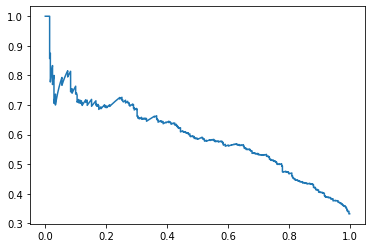

In [19]:
plt.plot( recl, pres )

In [20]:
from sklearn.metrics import average_precision_score

In [21]:
# площадь под кривой
average_precision_score( y_test, predictions[:, 1] )

0.5952918084987003

### ROC

In [22]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [23]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )

In [24]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0, 1.9407708920427602)
(0.0, 0.0023752969121140144, 0.9407708920427602)
(0.0, 0.014251781472684086, 0.8771060923803257)
(0.0011723329425556857, 0.014251781472684086, 0.8766657821165668)
(0.0011723329425556857, 0.0166270783847981, 0.8747371657994644)
(0.0023446658851113715, 0.0166270783847981, 0.8737639096940027)
(0.0023446658851113715, 0.023752969121140142, 0.8673344314103671)
(0.0035169988276670576, 0.023752969121140142, 0.8615264251889507)
(0.0035169988276670576, 0.028503562945368172, 0.8369749112081297)
(0.005861664712778429, 0.028503562945368172, 0.8264483806232882)
(0.005861664712778429, 0.0332541567695962, 0.8252370130062859)
(0.007033997655334115, 0.0332541567695962, 0.8241576501779562)
(0.007033997655334115, 0.05463182897862233, 0.8038388138189404)
(0.008206330597889801, 0.05463182897862233, 0.80294258877378)
(0.008206330597889801, 0.07363420427553444, 0.7757364672820294)
(0.009378663540445486, 0.07363420427553444, 0.7698637156253426)
(0.009378663540445486, 0.0831353919

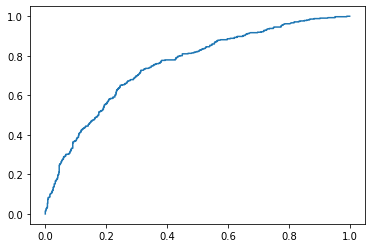

In [25]:
plt.plot( fpr, tpr )

**Построим еще одну модель и сравним их между собой**

In [26]:
Xshort = data.loc[ :, ['age', 'children'] ]
Xshort.head()

,age,children
0,32.0,3.0
1,27.0,3.0
2,22.0,0.0
3,37.0,4.0
4,27.0,1.0


In [27]:
model2 = LogisticRegression()

In [28]:
X_train_short, X_test_short, y_train, y_test = train_test_split( Xshort, data['affair'], test_size = 0.3, random_state = 0 )

In [29]:
model2.fit( X_train_short, y_train )

LogisticRegression()

In [30]:
predictions2 = model2.predict_proba( X_test_short )

In [31]:
fpr2, tpr2, thres2 = roc_curve( y_test, predictions2[:, 1] )

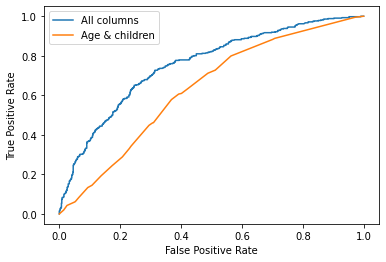

In [32]:
plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'Age & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Посчитаем площадь под ROC-кривой для двух моделей**

In [33]:
from sklearn.metrics import roc_auc_score

In [34]:
roc_auc_score( y_test, predictions2[:, 1] )

0.6311452091928271

In [35]:
roc_auc_score( y_test, predictions2[:, 1] )

0.6311452091928271

In [36]:
from sklearn.metrics import auc

In [37]:
auc( fpr, tpr )

0.75422638556666

In [38]:
auc( fpr2, tpr2 )

0.6311452091928271

In [39]:
X_train.shape

(5092, 18)

In [40]:
y_train.shape

(4456,)

## Пример влияния L1 и L2-регуляризации

In [41]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='saga', max_iter=1000 ).fit( X_train_short, y_train )
predictions = model1.predict_proba( X_test_short )

In [42]:
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( X_train_short, y_train )
predictions2 = model2.predict_proba( X_test_short )

In [43]:
model3 = LogisticRegression( penalty = 'l1', C = 0.001, solver='liblinear' ).fit( X_train_short, y_train )
predictions3 = model3.predict_proba( X_test_short )

In [44]:
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( y_test, predictions3[:, 1] )

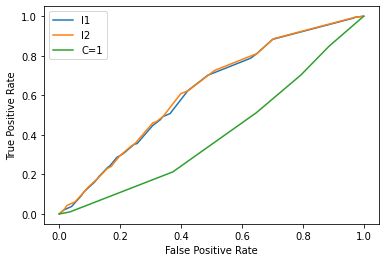

In [45]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Построим еще одну модель, используя другие признаки**

In [46]:
Xshort = pd.get_dummies( data.loc[ :, ['age', 'children'] ], columns = ['age', 'children'] )
Xshort.head()

,age_17.5,age_22.0,age_27.0,age_32.0,age_37.0,age_42.0,children_0.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.5
0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,0


In [47]:
Y = data['affair']

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [49]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( X_train, Y_train )
model3 = LogisticRegression( penalty = 'l2', C = 1 ).fit( X_train, Y_train )

In [50]:
predictions = model1.predict_proba( X_test )
predictions2 = model2.predict_proba( X_test )
predictions3 = model3.predict_proba( X_test )

In [51]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

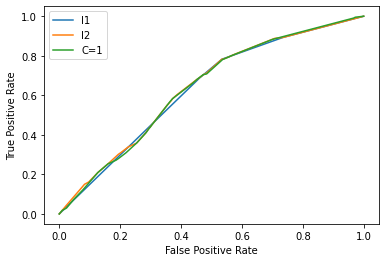

In [52]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

In [53]:
from sklearn.svm import LinearSVC

In [63]:
linearSVC = LinearSVC().fit(X_train, Y_train)
linearSVC_predict = linearSVC.predict(X_test)
y_score = linearSVC.decision_function(X_test)
linearSVC.score(X_test, Y_test)

0.6821989528795811

In [64]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.40


In [59]:
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [60]:
print('MSE = ',mean_squared_error(Y_test, linearSVC_predict))
print('Ср.абс.ош. = ',mean_absolute_error(Y_test, linearSVC_predict))
print('f1=', f1_score(Y_test, linearSVC_predict, average='macro'))

MSE =  0.31780104712041884
Ср.абс.ош. =  0.31780104712041884
f1= 0.4055399937752879


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.40')

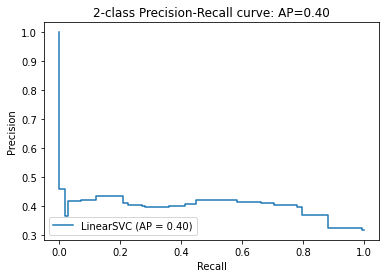

In [65]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(linearSVC, X_test, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [66]:
fpr, tpr, thres = roc_curve( Y_test, linearSVC_predict )


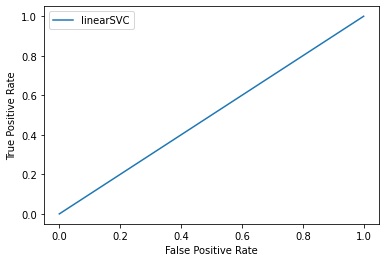

In [67]:
plt.plot( fpr, tpr, label = 'linearSVC' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend( loc = 0 )
plt.show()

In [69]:
from sklearn.linear_model import SGDClassifier

In [70]:
sgd = SGDClassifier().fit(X_train, Y_train)
sgd_predict = sgd.predict_proba(X_test)
sgd.score(X_test, Y_test)

AttributeError: probability estimates are not available for loss='hinge'